In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Описание датасета:

rank: Position of the YouTube channel based on the number of subscribers
Youtuber: Name of the YouTube channel
subscribers: Number of subscribers to the channel
video views: Total views across all videos on the channel
category: Category or niche of the channel
Title: Title of the YouTube channel
uploads: Total number of videos uploaded on the channel
Country: Country where the YouTube channel originates
Abbreviation: Abbreviation of the country
channel_type: Type of the YouTube channel (e.g., individual, brand)
video_views_rank: Ranking of the channel based on total video views
country_rank: Ranking of the channel based on the number of subscribers within its country
channel_type_rank: Ranking of the channel based on its type (individual or brand)
video_views_for_the_last_30_days: Total video views in the last 30 days
lowest_monthly_earnings: Lowest estimated monthly earnings from the channel
highest_monthly_earnings: Highest estimated monthly earnings from the channel
lowest_yearly_earnings: Lowest estimated yearly earnings from the channel
highest_yearly_earnings: Highest estimated yearly earnings from the channel
subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days
created_year: Year when the YouTube channel was created
created_month: Month when the YouTube channel was created
created_date: Exact date of the YouTube channel’s creation
Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country
Population: Total population of the country
Unemployment rate: Unemployment rate in the country
Urban_population: Percentage of the population living in urban areas
Latitude: Latitude coordinate of the country’s location
Longitude: Longitude coordinate of the country’s location



Задание 1. EDA
Проведите разведывательный анализ данных (EDA).

Задайте не менее 6 вопросов к данным и постарайтесь ответить на них, используя визуализацию.
Изобразите матрицу корреляций для нахождения взаимосвязей.

In [ ]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='unicode_escape')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [ ]:
df["created_year"] = df["created_year"].astype("Int64")

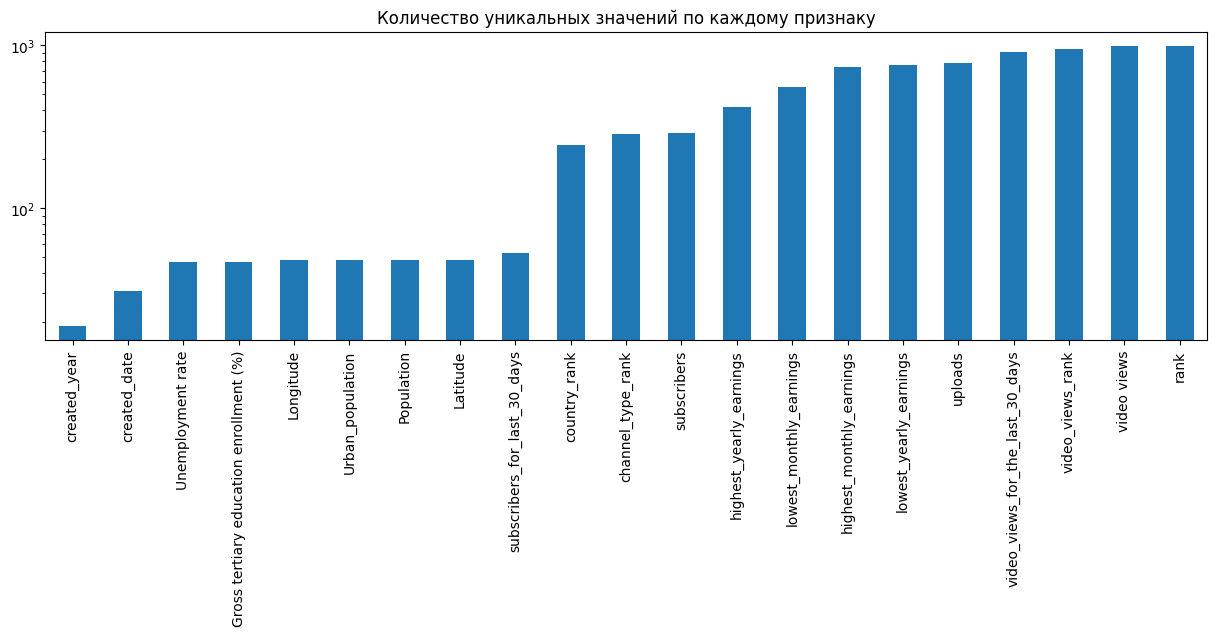

In [ ]:
#Какое количество уникальных значений по каждому признаку?
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Количество уникальных значений по каждому признаку");

In [ ]:
#Из каких стран первые ютюб-каналы в рейтинге?
df["Country"].value_counts()

United States           313
India                   168
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Australia                 9
Saudi Arabia              9
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru                      1
Andorra             

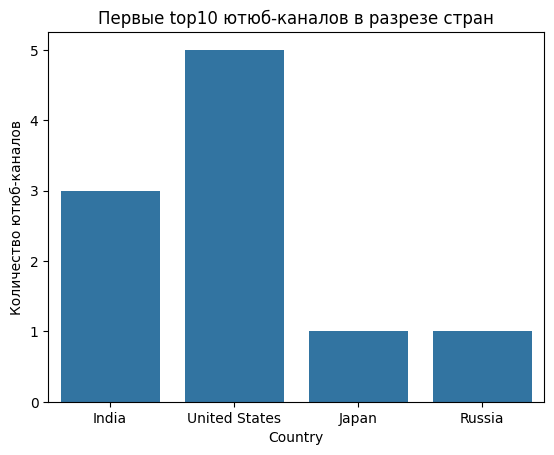

In [ ]:
#Из каких стран первые 10 ютюб-каналов в рейтинге
sns.countplot(data=df[0:11], x="Country")
plt.title("Первые top10 ютюб-каналов в разрезе стран")
plt.ylabel("Количество ютюб-каналов")
plt.show()

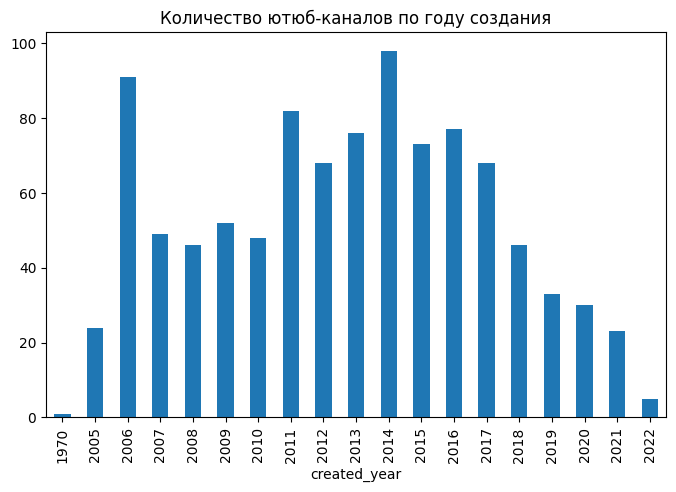

In [ ]:
plt.figure(figsize=[8,5])
df.groupby('created_year')['rank'].count().plot(kind="bar")
plt.title("Количество ютюб-каналов по году создания")
plt.show()

Есть одно явно неправильное значение года - 1970.
Нужно удалить эту строку из данных

In [ ]:
df.loc[df['created_year'] == 1970]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
101,102,YouTube,36300000,3.010785e+09,News & Politics,YouTube,744,United States,US,Entertainment,...,300000.0,1970,Jan,1.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891


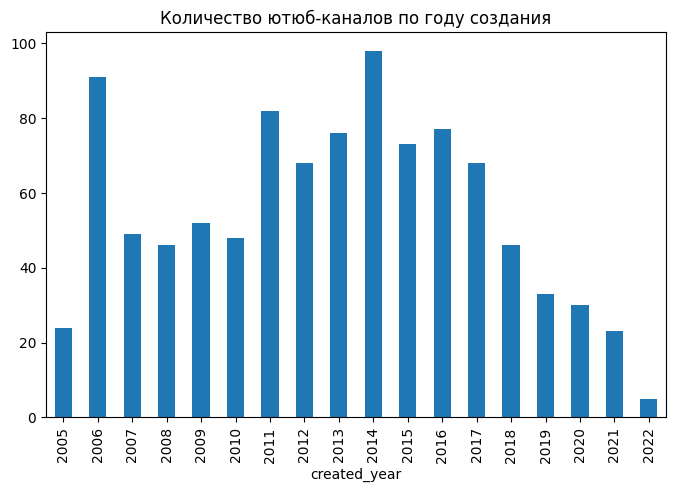

In [ ]:
df = df[df.created_year != 1970 ]
plt.figure(figsize=[8,5])
df.groupby('created_year')['rank'].count().plot(kind="bar")
plt.title("Количество ютюб-каналов по году создания")
plt.show()

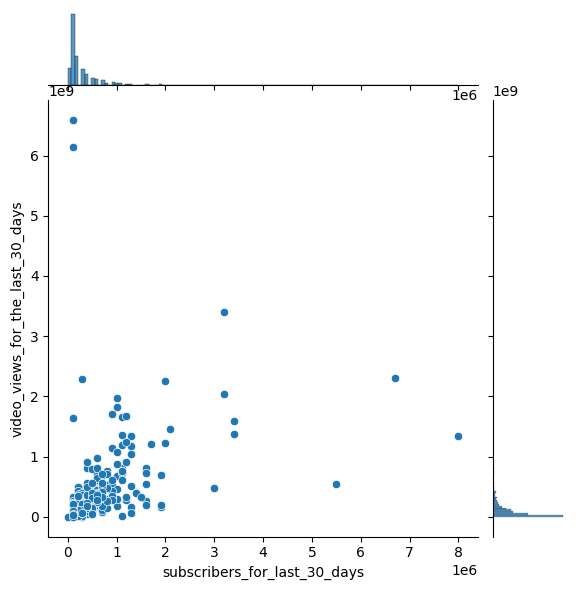

In [ ]:
#Зависит ли количество просмотров видео от количества подписчиков?
sns.jointplot(x='subscribers_for_last_30_days', y ='video_views_for_the_last_30_days', data=df)
#df.plot(kind='scatter', x='subscribers_for_last_30_days', y='video_views_for_the_last_30_days')

Вывод: да, зависит. Зависимость линейная

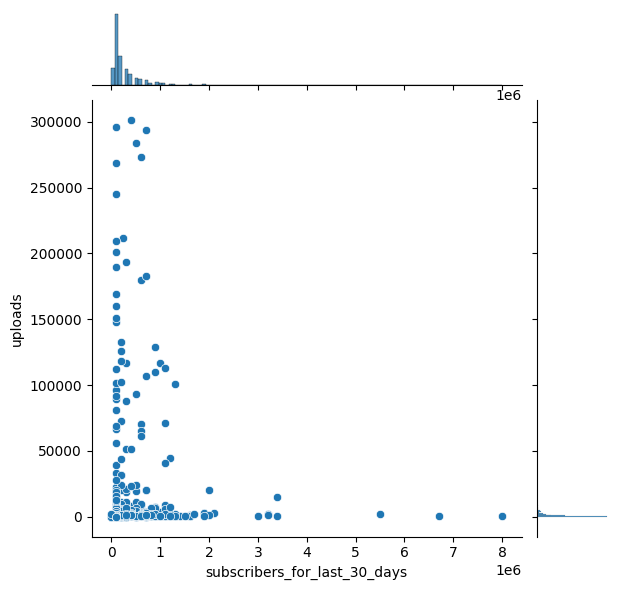

In [ ]:
#Зависит ли количество загрузок видео от количества подписчиков?
sns.jointplot(x='subscribers_for_last_30_days', y ='uploads', data=df)

Вывод: нет, не зависит

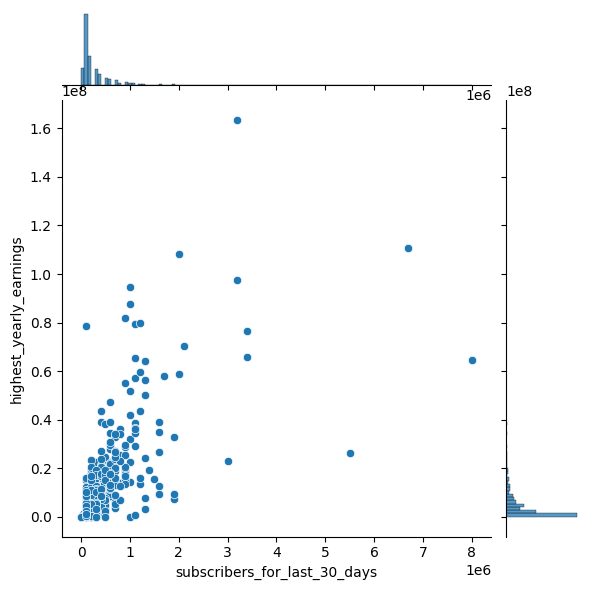

In [ ]:
#Зависит ли наивыший годовой доход канала от количества подписчиков?
sns.jointplot(x='subscribers_for_last_30_days', y ='highest_yearly_earnings', data=df)

Вывод: да, зависит. Зависимость линейная

In [ ]:
df.corr()

<ipython-input-375-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,1.000000,-0.640372,-0.454259,-0.051290,-0.060975,0.011005,-0.033586,-0.187089,-0.249329,-0.248985,...,-0.249329,-0.188960,0.097469,-0.008616,-0.036728,-0.025227,-0.014790,-0.038487,0.002222,0.018921
subscribers,-0.640372,1.000000,0.751599,0.077003,0.060489,0.039789,0.029609,0.279255,0.389080,0.388717,...,0.389075,0.309719,-0.141156,-0.010567,-0.006743,0.081851,-0.008598,0.082985,0.017483,0.023184
video views,-0.454259,0.751599,1.000000,0.165557,-0.060939,-0.065127,-0.049380,0.361720,0.551908,0.551266,...,0.551902,0.187363,-0.138956,-0.039210,-0.013491,0.079262,0.000377,0.076159,0.035288,0.031057
uploads,-0.051290,0.077003,0.165557,1.000000,-0.107773,-0.077039,-0.098186,0.101431,0.166276,0.166637,...,0.166257,0.008899,-0.164905,0.034528,-0.218067,0.142660,-0.187884,0.072574,-0.069482,0.233713
video_views_rank,-0.060975,0.060489,-0.060939,-0.107773,1.000000,0.874330,0.949522,-0.067326,-0.206634,-0.206706,...,-0.206623,-0.167344,0.002997,0.030599,0.036269,-0.100514,-0.031166,-0.120830,0.024273,-0.019743
country_rank,0.011005,0.039789,-0.065127,-0.077039,0.874330,1.000000,0.895743,-0.098857,-0.146488,-0.146500,...,-0.146487,-0.126214,-0.043272,-0.013249,0.090381,-0.048840,0.066239,-0.020197,0.060789,-0.078379
channel_type_rank,-0.033586,0.029609,-0.049380,-0.098186,0.949522,0.895743,1.000000,-0.129204,-0.187420,-0.187481,...,-0.187409,-0.154075,-0.018674,0.037694,0.058324,-0.116750,-0.002246,-0.127258,0.007599,-0.050789
video_views_for_the_last_30_days,-0.187089,0.279255,0.361720,0.101431,-0.067326,-0.098857,-0.129204,1.000000,0.680274,0.680234,...,0.680275,0.451532,0.051930,-0.014359,-0.035211,0.053765,-0.001832,0.051261,-0.026643,0.048632
lowest_monthly_earnings,-0.249329,0.389080,0.551908,0.166276,-0.206634,-0.146488,-0.187420,0.680274,1.000000,0.999955,...,0.999998,0.679458,0.071404,-0.041082,-0.060450,0.103872,-0.041853,0.080719,0.004403,0.100428
highest_monthly_earnings,-0.248985,0.388717,0.551266,0.166637,-0.206706,-0.146500,-0.187481,0.680234,0.999955,1.000000,...,0.999953,0.679797,0.071371,-0.040772,-0.060231,0.103845,-0.041605,0.080739,0.004694,0.100347


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-376-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,1.000000,-0.640372,-0.454259,-0.051290,-0.060975,0.011005,-0.033586,-0.187089,-0.249329,-0.248985,-0.249530,-0.249329,-0.188960,0.097469,-0.008616,-0.036728,-0.025227,-0.014790,-0.038487,0.002222,0.018921
subscribers,-0.640372,1.000000,0.751599,0.077003,0.060489,0.039789,0.029609,0.279255,0.389080,0.388717,0.389212,0.389075,0.309719,-0.141156,-0.010567,-0.006743,0.081851,-0.008598,0.082985,0.017483,0.023184
video views,-0.454259,0.751599,1.000000,0.165557,-0.060939,-0.065127,-0.049380,0.361720,0.551908,0.551266,0.552589,0.551902,0.187363,-0.138956,-0.039210,-0.013491,0.079262,0.000377,0.076159,0.035288,0.031057
uploads,-0.051290,0.077003,0.165557,1.000000,-0.107773,-0.077039,-0.098186,0.101431,0.166276,0.166637,0.167100,0.166257,0.008899,-0.164905,0.034528,-0.218067,0.142660,-0.187884,0.072574,-0.069482,0.233713
video_views_rank,-0.060975,0.060489,-0.060939,-0.107773,1.000000,0.874330,0.949522,-0.067326,-0.206634,-0.206706,-0.206720,-0.206623,-0.167344,0.002997,0.030599,0.036269,-0.100514,-0.031166,-0.120830,0.024273,-0.019743
country_rank,0.011005,0.039789,-0.065127,-0.077039,0.874330,1.000000,0.895743,-0.098857,-0.146488,-0.146500,-0.146559,-0.146487,-0.126214,-0.043272,-0.013249,0.090381,-0.048840,0.066239,-0.020197,0.060789,-0.078379
channel_type_rank,-0.033586,0.029609,-0.049380,-0.098186,0.949522,0.895743,1.000000,-0.129204,-0.187420,-0.187481,-0.187505,-0.187409,-0.154075,-0.018674,0.037694,0.058324,-0.116750,-0.002246,-0.127258,0.007599,-0.050789
video_views_for_the_last_30_days,-0.187089,0.279255,0.361720,0.101431,-0.067326,-0.098857,-0.129204,1.000000,0.680274,0.680234,0.680222,0.680275,0.451532,0.051930,-0.014359,-0.035211,0.053765,-0.001832,0.051261,-0.026643,0.048632
lowest_monthly_earnings,-0.249329,0.389080,0.551908,0.166276,-0.206634,-0.146488,-0.187420,0.680274,1.000000,0.999955,0.999942,0.999998,0.679458,0.071404,-0.041082,-0.060450,0.103872,-0.041853,0.080719,0.004403,0.100428
highest_monthly_earnings,-0.248985,0.388717,0.551266,0.166637,-0.206706,-0.146500,-0.187481,0.680234,0.999955,1.000000,0.999884,0.999953,0.679797,0.071371,-0.040772,-0.060231,0.103845,-0.041605,0.080739,0.004694,0.100347


Задание 2. Корреляционный анализ

Оставьте два коррелирующих столбца: "subscribers" и"video views".
Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
Рассчитайте коэффициент корреляции Пирсона.
Определите "video views" как признак Х, а "subscribers" - как целевую переменную.
Разделите выборку на тестовую и тренировочную.
Постройте модель линейной регрессии.
Рассчитайте точность модели на тестовой выборке.
Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df_filtered = df[df['video views'] != 0]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     981 non-null    int64  
 1   Youtuber                                 981 non-null    object 
 2   subscribers                              981 non-null    int64  
 3   video views                              981 non-null    float64
 4   category                                 942 non-null    object 
 5   Title                                    981 non-null    object 
 6   uploads                                  981 non-null    int64  
 7   Country                                  867 non-null    object 
 8   Abbreviation                             867 non-null    object 
 9   channel_type                             956 non-null    object 
 10  video_views_rank                         981 non-n

In [ ]:
X = df_filtered[['subscribers']]
y = df_filtered['video views']
df_filtered[['subscribers', 'video views']].corr()

,subscribers,video views
subscribers,1.00000,0.82509
video views,0.82509,1.00000


<Axes: xlabel='subscribers', ylabel='video views'>

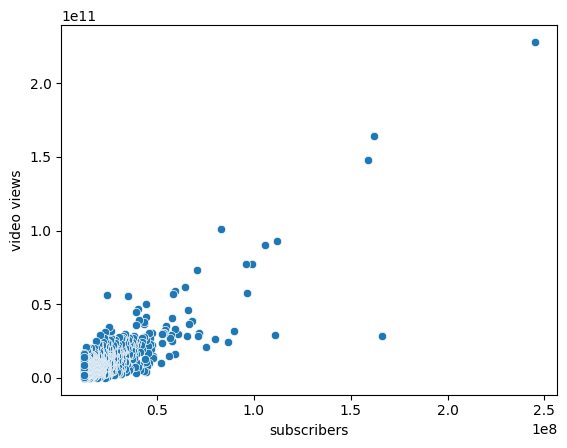

In [ ]:
sns.scatterplot(x="subscribers",
                    y="video views",
                    data=df_filtered)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(686, 1)

In [ ]:
y_train.shape

(686,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([712.88492105])

In [ ]:
model.intercept_

-4773706711.212196

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

803    9.106782e+09
507    2.977742e+09
145    2.103175e+10
581    1.022724e+10
70     1.760893e+10
           ...     
772    6.973933e+09
578    7.141825e+09
930    1.159290e+09
903    1.698280e+09
532    1.084795e+10
Name: video views, Length: 295, dtype: float64

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации
#высокий коэффициент детерминации - модель хорошего качества

0.676082418458946

In [ ]:
# Также оценим качество, при помощи метода mean_squared_error для тестовой выборки
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, model.predict(X_test))

5.112149948205907e+19

In [ ]:
mean_squared_error(y_train, model.predict(X_train))

6.959893593873866e+19

СКО тестовой и обучающейся моделей примерно равны, качество обучающейся модели - хорошее

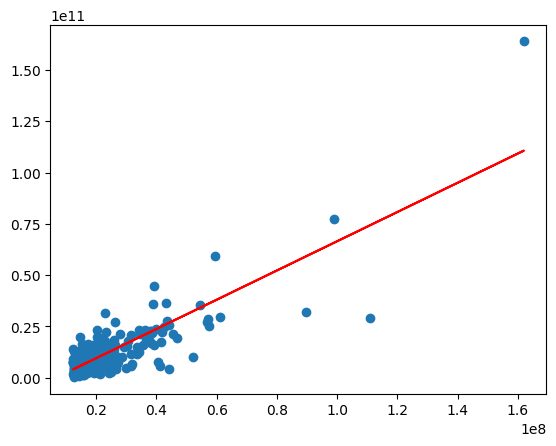

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

(array([  1.,   0.,   0.,   4.,  37., 219.,  28.,   4.,   1.,   1.]),
 array([-5.32863495e+10, -4.34278670e+10, -3.35693846e+10, -2.37109021e+10,
        -1.38524197e+10, -3.99393721e+09,  5.86454525e+09,  1.57230277e+10,
         2.55815102e+10,  3.54399926e+10,  4.52984751e+10]),
 <BarContainer object of 10 artists>)

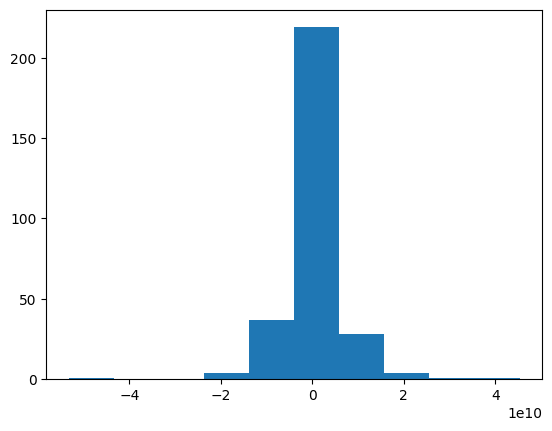

In [ ]:
plt.hist(y_pred-y_test)

Распределение остатков нормальное - модель хорошая

In [ ]:
#если не убирать нулевые значения, то корреляция между признаками становится меньше, следовательно, линейная модель будет хуже по качеству
df[['subscribers', 'video views']].corr()

,subscribers,video views
subscribers,1.000000,0.751599
video views,0.751599,1.000000


Задание 3. Классификация

Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]
Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.
Разделите выборку на тестовую и тренировочную, укажите random_state=13.`
Постройте модель логистической регрессии.
Рассчитайте точность модели на тестовой выборке.
Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

In [ ]:
df_bycat= df.groupby('category').size()
print(df_bycat.sort_values())

category
Travel & Events            1
Nonprofits & Activism      2
Trailers                   2
Movies                     2
Autos & Vehicles           2
Pets & Animals             4
Sports                    11
Shows                     13
Science & Technology      17
News & Politics           25
Howto & Style             40
Education                 45
Film & Animation          46
Comedy                    69
Gaming                    93
People & Blogs           131
Music                    200
Entertainment            240
dtype: int64


In [ ]:
options = ['Music', 'Entertainment']

# selecting rows based on condition
rslt_df = df[df['category'].isin(options)]
rslt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 989
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     440 non-null    int64  
 1   Youtuber                                 440 non-null    object 
 2   subscribers                              440 non-null    int64  
 3   video views                              440 non-null    float64
 4   category                                 440 non-null    object 
 5   Title                                    440 non-null    object 
 6   uploads                                  440 non-null    int64  
 7   Country                                  393 non-null    object 
 8   Abbreviation                             393 non-null    object 
 9   channel_type                             430 non-null    object 
 10  video_views_rank                         440 non-n

In [ ]:
df_filtered = rslt_df[rslt_df['video views'] != 0]
df_filtered.info()
#таким образом, от фильтрвации ненулевых значений video views результат не изменится (таких значений просто нет)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 989
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     440 non-null    int64  
 1   Youtuber                                 440 non-null    object 
 2   subscribers                              440 non-null    int64  
 3   video views                              440 non-null    float64
 4   category                                 440 non-null    object 
 5   Title                                    440 non-null    object 
 6   uploads                                  440 non-null    int64  
 7   Country                                  393 non-null    object 
 8   Abbreviation                             393 non-null    object 
 9   channel_type                             430 non-null    object 
 10  video_views_rank                         440 non-n

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'category'.
rslt_df['category']= label_encoder.fit_transform(rslt_df['category'])

rslt_df['category'].unique()
rslt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 989
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     440 non-null    int64  
 1   Youtuber                                 440 non-null    object 
 2   subscribers                              440 non-null    int64  
 3   video views                              440 non-null    float64
 4   category                                 440 non-null    int64  
 5   Title                                    440 non-null    object 
 6   uploads                                  440 non-null    int64  
 7   Country                                  393 non-null    object 
 8   Abbreviation                             393 non-null    object 
 9   channel_type                             430 non-null    object 
 10  video_views_rank                         440 non-n

<ipython-input-399-fcf0d162e08d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['category']= label_encoder.fit_transform(rslt_df['category'])


In [ ]:
X = rslt_df[['video views', 'subscribers', 'uploads']]
y = rslt_df['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
model.predict_proba(X_test)

array([[0.53328831, 0.46671169],
       [0.55356095, 0.44643905],
       [0.4382215 , 0.5617785 ],
       [0.55835862, 0.44164138],
       [0.00188911, 0.99811089],
       [0.45580711, 0.54419289],
       [0.56920574, 0.43079426],
       [0.39300708, 0.60699292],
       [0.47760068, 0.52239932],
       [0.55556904, 0.44443096],
       [0.4203265 , 0.5796735 ],
       [0.50390434, 0.49609566],
       [0.41724687, 0.58275313],
       [0.49636144, 0.50363856],
       [0.45519365, 0.54480635],
       [0.47992174, 0.52007826],
       [0.42953306, 0.57046694],
       [0.4767223 , 0.5232777 ],
       [0.49401007, 0.50598993],
       [0.40688038, 0.59311962],
       [0.10061584, 0.89938416],
       [0.64293405, 0.35706595],
       [0.24553688, 0.75446312],
       [0.43519826, 0.56480174],
       [0.55807243, 0.44192757],
       [0.50685415, 0.49314585],
       [0.33936691, 0.66063309],
       [0.4234562 , 0.5765438 ],
       [0.41674734, 0.58325266],
       [0.35423006, 0.64576994],
       [0.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.5568181818181818

Значение довольно высокое - модель относительно хороша

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix (y_test, y_pred)
cnf_matrix

array([[24, 32],
       [ 7, 25]])

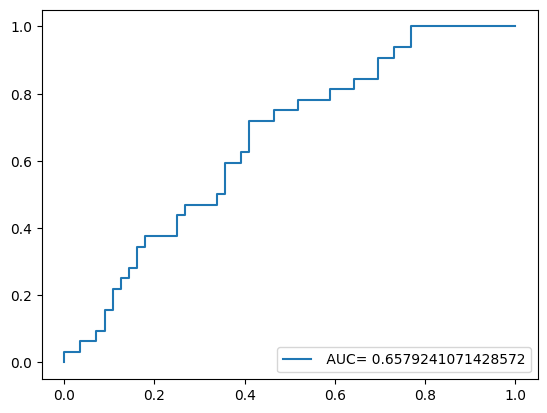

In [ ]:
#define metrics
y_pred_proba = model.predict_proba (X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)

#create ROC curve
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()

Чем выше AUC (площадь под кривой), тем точнее наша модель может предсказывать результаты